# Lois gaussiennes et visualisation interactive

***
> __Auteur__: Joseph Salmon <joseph.salmon@umontpellier.fr>

In [12]:
%matplotlib inline
from download import download
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm
from ipywidgets import interact  # widget manipulation
import seaborn as sns

In [2]:
sns.set_context("paper", font_scale=1)
sns.set_style("ticks")
sns.set_palette("colorblind")

In [15]:
dirname = "../prebuiltimages/"
imageformat = ".pdf"


## Visualisation des densités gaussiennes: impact des paramètres de centrage ($\mu$) et de dispersion ($\sigma$)

In [3]:
x = np.linspace(-5, 5, num=400)

In [4]:

def gaussian_mean_and_std(mean=0, std=1):
    """Visualize the Gaussian quantile"""
    fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
    ax1.plot(x, norm.pdf(x, mean, std), '-', lw=2, label=r"$\varphi_{\mu, \sigma}$")
    ax1.set_ylim(0, 1)
    ax1.set_title(r"Densité d'une loi gaussienne en fonction des paramètres:" + "\n" +
                  r" Centrage $\mu = {0:.2f}$,  Dispersion: $\sigma = {1:.2f}$".format(mean, std), fontsize=10)
    plt.legend()
    plt.show()

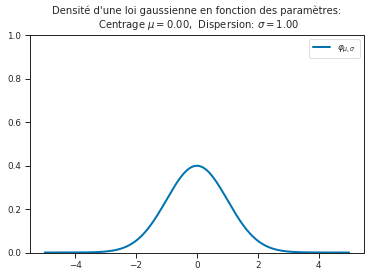

<function __main__.gaussian_mean_and_std>

In [5]:
interact(gaussian_mean_and_std, mean=(-3., 3., 0.01),std =(0.1, 4, 0.05))

## Visualisation des quantiles gaussiens

In [6]:
def gaussian_quantile(alpha=0.9):
    """Visualize Gaussian quantiles"""

    quantile = norm.ppf(alpha, 0, 1)
    fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
    ax1.plot(x, norm.pdf(x, 0, 1), '-', lw=2, label=r"$\varphi$")
    ax1.set_ylim(0, 0.5)
    ax1.fill_between(x, 0, norm.pdf(x, 0, 1), where=x <= quantile)
    plt.axvline(x=quantile, c='k', ls="--", lw=1)
    ax1.set_title(r"Visualisation des quantiles:" + "\n" +
                  r"Niveau $ \alpha = {0:.2f},$  Aire = $\Phi^{{-1}}(\alpha)={1:.2f}$".format(alpha, quantile), fontsize=10)
    plt.legend()
    plt.show()

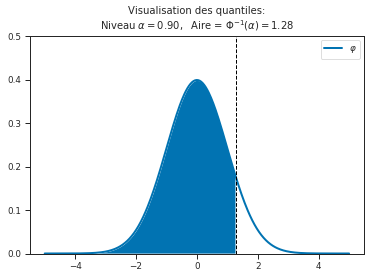

<function __main__.gaussian_quantile>

In [7]:
interact(gaussian_quantile, alpha=(0.001, .999, 0.001))  # change the first and second value to check more quantiles 

In [8]:
# Figures pour les slides:

In [13]:
# to use the default values of utils for instance
saving = True
path_target = "./utils.py"
url_shared_files = "http://josephsalmon.eu/enseignement/Montpellier/HLMA408/sharedcode/utils.py"
download(url_shared_files, path_target, replace=False)
from utils import my_saving_display

file_sizes: 100%|███████████████████████████████| 967/967 [00:00<00:00, 812kB/s]


Successfully downloaded file to ./utils.py


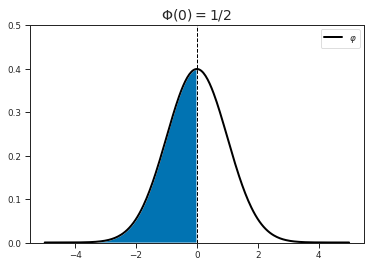

In [16]:
x = np.linspace(-5, 5, 300)

fig, ax1 = plt.subplots(1, 1)
ax1.plot(x, norm.pdf(x, 0, 1), 'k-', lw=2, label=r"$\varphi$")
ax1.set_ylim(0, 0.5)
ax1.fill_between(x, 0, norm.pdf(x, 0, 1), where=x <= 0)
plt.axvline(x=0, c='k', ls="--", lw=1)
plt.title("$\Phi(0)=1/2$", fontsize=14)
plt.legend()
my_saving_display(fig, dirname, "Gaussian_phi0", imageformat, saving=saving)

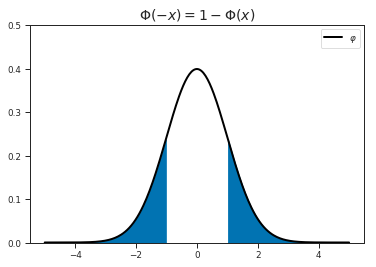

In [19]:
x = np.linspace(-5, 5, 300)

lim = 1
fig, ax1 = plt.subplots(1, 1)
ax1.plot(x, norm.pdf(x, 0, 1), 'k-', lw=2, label=r"$\varphi$")
ax1.set_ylim(0, 0.5)
ax1.fill_between(x, 0, norm.pdf(x, 0, 1), where=x <= -
                 lim, color=sns.color_palette()[0])
ax1.fill_between(x, 0, norm.pdf(x, 0, 1), where=x >=
                 lim, color=sns.color_palette()[0])
# plt.axvline(x=0, c='k', ls="--", lw=1)
plt.title("$\Phi(-x)=1-\Phi(x)$", fontsize=14)
plt.legend()
my_saving_display(fig, dirname, "Gaussian_phi_moins_x",
                  imageformat, saving=saving)

In [22]:
norm.cdf(1, 0, 1)-norm.cdf(-1, 0, 1)

0.6826894921370859

In [25]:
2 * norm.cdf(1, 0, 1)-1

0.6826894921370859

In [27]:
2 * norm.cdf(2, 0, 1)-1

0.9544997361036416